## Test analysing frequency sweep for 0375 Bernard and Ellipsoid

- Test reading to google drive
- convert all outputs to CSV files
- plot a couple to check sanity
- plot correlations as function of frequency

In [3]:
from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [4]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/0375_unshifted/'
ELLIPSOID_PATH = 'Ellipsoid/0375_unshifted/'

In [5]:
frequencies = []
wavelengths = []
for freq in range(20):
    path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'H_DICT_PKL/' + f'Ellipsoid_0375_sweep_H_1_60_20_f{freq}_dict.pkl'
    conv = converter.from_pickle(path)
    frequencies.append(conv.frequency)
    wavelengths.append(conv.wavelength)

### Converting outputs to csv files

#### Ellipsoid

In [6]:
for polarisation in ['H', 'V']:
    for freq in range(20):
        path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'{polarisation}_DICT_PKL/' + f'Ellipsoid_0375_sweep_{polarisation}_1_60_20_f{freq}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'{polarisation}_CSV/' + f'Ellipsoid_0375_sweep_{polarisation}_1_60_20_f{freq}_df.csv'

        df.to_csv(output_path)

#### Bernard

In [7]:
for freq in range(20):
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'H_DICT_PKL/' + f'Fullsize_B_freq_sweep_H_1_60_20_f{freq}_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()

    output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'H_CSV/' + f'Bernard_0375_sweep_H_1_60_20_f{freq}_df.csv'

    df.to_csv(output_path)

In [8]:
for freq in range(20):
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'V_DICT_PKL/' + f'Fullsize_B_freq_sweep_1_60_20_f{freq}_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()

    output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'V_CSV/' + f'Bernard_0375_sweep_V_1_60_20_f{freq}_df.csv'

    df.to_csv(output_path)

### Single pol RCS

In [9]:
single_pol_obj_dict = {
    'Bernard' :{
        'H' : [],
        'V' : [],
    },
    'Ellipsoid' : {
        'H' : [],
        'V' : [],
    },
}

In [11]:
for model, model_path in zip(['Bernard', 'Ellipsoid'], [BERNARD_PATH, ELLIPSOID_PATH]):
    for pol in ['H','V']:
        for freq in range(20):
            path = BASE_DRIVE_PATH + model_path + f'/{pol}_CSV/' + f'{model}_0375_sweep_{pol}_1_60_20_f{freq}_df.csv'
            single_pol_obj_dict[model][pol].append(pd.read_csv(path))

In [12]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

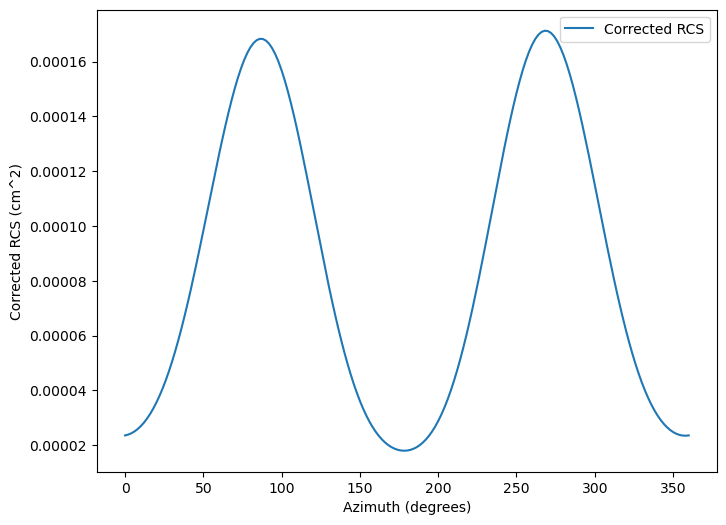

In [13]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['H'][1])

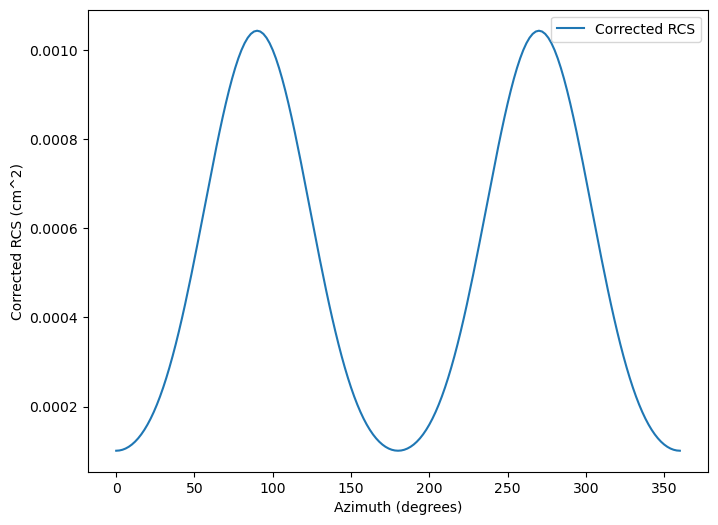

0.5


In [14]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['H'][1])
print(wavelengths[19])

In [15]:
single_pol_obj_dict['Bernard']['H'][1]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['H'][19]['Corrected_RCS'])

np.float64(0.7508274540011535)

In [16]:
H_corrs = []
V_corrs = []
H_mean_ratio = []

for freq in range(20):
    H_corrs.append(single_pol_obj_dict['Bernard']['H'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['H'][freq]['Corrected_RCS']))
    V_corrs.append(single_pol_obj_dict['Bernard']['V'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['V'][freq]['Corrected_RCS']))
    H_mean_ratio.append(single_pol_obj_dict['Bernard']['H'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['H'][freq]['Corrected_RCS'].mean())

In [17]:
H_corrs

[np.float64(0.98867590474562),
 np.float64(0.9950475658301612),
 np.float64(0.9791092571096434),
 np.float64(0.24712907567381762),
 np.float64(-0.7295878971681501),
 np.float64(0.5556256835166379),
 np.float64(0.26343918487221235),
 np.float64(-0.3469890982063089),
 np.float64(-0.2738570737740099),
 np.float64(-0.7843329731057043),
 np.float64(0.262061131350264),
 np.float64(0.12281177938380147),
 np.float64(-0.08141986768346811),
 np.float64(0.7099818639359627),
 np.float64(0.5413008461998124),
 np.float64(0.6539335202563322),
 np.float64(0.3404351251015162),
 np.float64(0.6164659313951962),
 np.float64(0.8368239634099984),
 np.float64(0.8908307892767441)]

In [21]:
def wavelength(frequency):
    return 3e10 / (frequency * 1e9)

wavelength(9.4)

3.1914893617021276

In [33]:
frequencies = [2.47, 3.8, 5.02, ,9.4,15, 20, 30]

In [53]:
freq2

array([ 2.        ,  2.7021335 ,  3.65076273,  4.93242415,  6.66403427,
        9.00355514, 12.16440399, 16.43492179, 22.20467639, 30.        ])

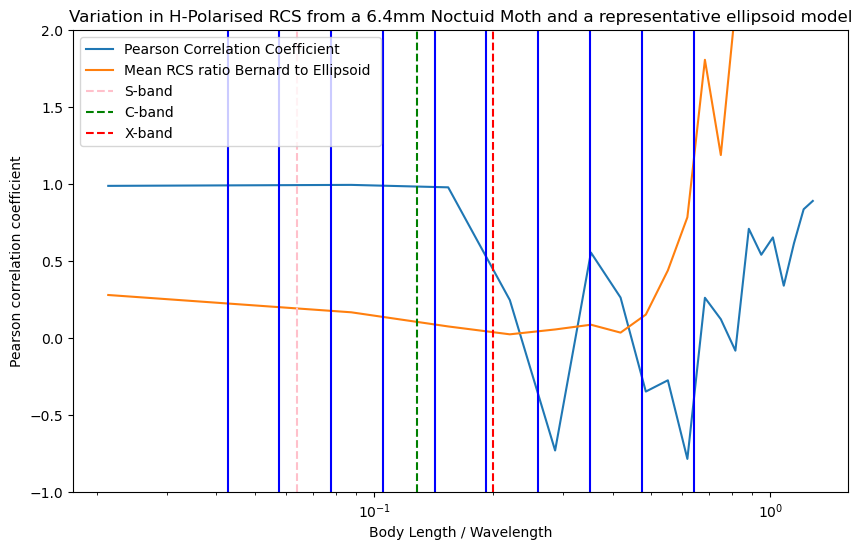

In [52]:
frequencies = [2.47, 3.8, 5.02,7 ,9.4, 12, 15, 20,25]

freq2 = np.logspace(np.log10(2), np.log10(30), 10)
wavelength_body_ratio = np.array(wavelengths)/0.64
body_wavelength_ratio = 0.64/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(body_wavelength_ratio, H_corrs, label='Pearson Correlation Coefficient')
plt.plot(body_wavelength_ratio, H_mean_ratio, label = 'Mean RCS ratio Bernard to Ellipsoid ')
plt.title('Variation in H-Polarised RCS from a 6.4mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Body Length / Wavelength')
plt.ylim(-1,2)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvline(x=0.64/10, color='pink', linestyle='--', label='S-band')
plt.axvline(x=0.64/5, color='g', linestyle='--', label='C-band')
plt.axvline(x=0.64/3.2, color='r', linestyle='--', label='X-band')

for freq in freq2:
    plt.axvline(x=0.64/wavelength(freq), color='b', linestyle='-')

plt.legend()

In [76]:
6/300, 6/1, 2/300, 2/1

(0.02, 6.0, 0.006666666666666667, 2.0)

In [77]:
300/6, 1/6, 300/2, 1/2

(50.0, 0.16666666666666666, 150.0, 0.5)

# ELLIPSOID PERMITIVITY!!! CHECK DOMAINS ON BERNARD, THINK ABOUT WAVELENGTHS
